<a href="https://colab.research.google.com/github/SrijaniBasu/DogBreedClassification/blob/main/DogBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srijanibasu","key":"8bd8c0c17a83c4ce50bebed0185ba8e2"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dog_dataset1


mkdir: cannot create directory ‘dog_dataset1’: File exists


In [ ]:
%cd dog_dataset1

/content/dog_dataset1


In [ ]:
!kaggle datasets list -s dogbreedidfromcomp

ref                                title                         size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------  ----------------------  ----------  --------------------------  -------------  ---------  ---------------  
catherinehorng/dogbreedidfromcomp  dog-breed-id-from-comp   724495926  2020-06-26 03:09:05.433000           8206         10  0.1764706        


In [ ]:
!kaggle datasets download catherinehorng/dogbreedidfromcomp
%cd ..

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp
License(s): unknown
 95% 657M/691M [00:03<00:00, 203MB/s]
100% 691M/691M [00:04<00:00, 162MB/s]
/content


In [ ]:
!unzip dog_dataset1/dogbreedidfromcomp.zip -d dog_dataset1

Streaming output truncated to the last 5000 lines.
  inflating: dog_dataset1/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog_dataset1/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog_dataset1/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog_dataset1/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog_dataset1/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog_dataset1/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog_dataset1/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog_dataset1/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog_dataset1/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog_dataset1/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog_dataset1/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog_dataset1/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog_dataset1/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog_dataset1/

In [ ]:
!rm dog_dataset1/dogbreedidfromcomp.zip
!rm dog_dataset1/sample_submission.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [ ]:
labels_all = pd.read_csv('dog_dataset1/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
breeds_all = labels_all['breed']
bread_count = breeds_all.value_counts()
bread_count.head()


,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [ ]:
Class_Names = ['scottish_deerhound','maltese_dog', 'bernese_mountain_dog']
labels = labels_all[labels_all['breed'].isin(Class_Names)]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [ ]:
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
y_data = label_binarize(labels['breed'], classes = Class_Names)

for i in tqdm(range(len(labels))):
  img = image.load_img('dog_dataset1/train/%s.jpg' %labels['id'][i], target_size=(224,224))
  img = image.img_to_array(img)
  x=np.expand_dims(img.copy(), axis=0)
  X_data[i] = x / 255

print('\nTrain Images shape:', X_data.shape, 'size:', '{:,}'.format(X_data.size))
print('\nOne-hot encoded ouput shape', y_data.shape, 'size:', '{:,}'.format(y_data.size))

100%|██████████| 357/357 [00:02<00:00, 166.09it/s]


Train Images shape: (357, 224, 224, 3) size: 53,738,496

One-hot encoded ouput shape (357, 3) size: 1,071


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), padding = 'Same', activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation ='relu',  kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(Class_Names), activation = "softmax"))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,923 (1019.23 KB)

 Trainable params: 260,923 (1019.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data, y_data, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size = 0.2)

In [ ]:
epochs = 100
batch_size = 128

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, y_val))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.3411 - loss: 5.0158 - val_accuracy: 0.3846 - val_loss: 4.7746
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.3490 - loss: 4.7248 - val_accuracy: 0.4154 - val_loss: 4.4904
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.4844 - loss: 4.4413 - val_accuracy: 0.4308 - val_loss: 4.2356
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.5260 - loss: 4.1485 - val_accuracy: 0.4615 - val_loss: 4.0246
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.5651 - loss: 3.8666 - val_accuracy: 0.4769 - val_loss: 3.7813
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 0.6641 - loss: 3.5450 - val_accuracy: 0.4923 - val_loss: 3.6459
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.6380 - loss: 3.4530 - val_accuracy: 0.6000 - val_loss: 3.5803
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.6562 - loss: 3.1886 - val_accuracy: 0.6154 - val

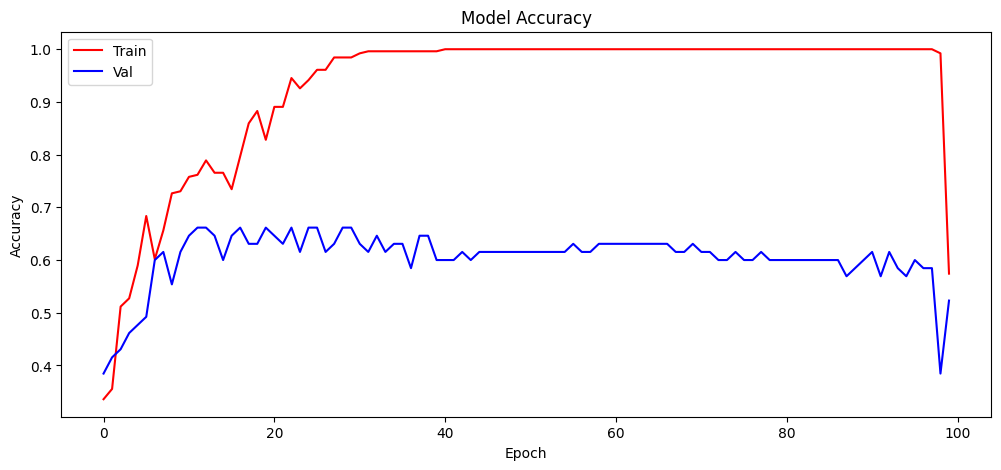

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 699ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.4236 - loss: 6.0402
Accuracy over the test set: 
  41.67 %


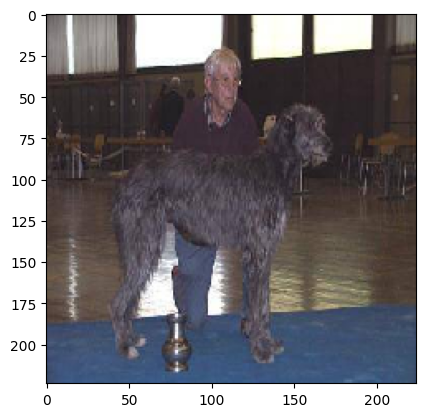

The predicted dog breed is: scottish_deerhound
The actual dog breed is: scottish_deerhound


In [ ]:
plt.imshow(X_test[1,:,:,:])
plt.show()
print('The predicted dog breed is:', Class_Names[np.argmax(y_pred[1])])
print('The actual dog breed is:', labels['breed'][np.argmax(y_test[1])])

In [ ]:
model.save("dog_breed.h5")